In [37]:
from __future__ import division, print_function
import pandas as pd
import pandas_profiling
import numpy as np
from sklearn import datasets, svm 
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

Load Standerd iris dat set .
We can add anny data set
using  pd.read_csv
ie 
data = pd.read_csv("~/diabetes.csv")


In [38]:
iris = datasets.load_iris()

X = iris.data[:,:2]
y = iris.target

#  Split data in test and train .
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


Sample <b><a href="https://www.kaggle.com/nulldata/intro-to-pandas-profiling-simple-fast-eda">Fast EDA </a> </b> can be done using pandas_profiling.ProfileReport.

In [52]:
a =pd.DataFrame(data=iris.data ,columns=iris.feature_names)
pandas_profiling.ProfileReport(a)

<b> Support Vector Classification </b>

 Specifies the kernel type to be used in the algorithm. It must be one of ‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’ or a callable.
 If none is given, ‘rbf’ will be used. If a callable is given it is used to pre-compute the kernel matrix from data matrices; that matrix should be an array of shape 

Radial Basis Function KernelTheRadial basis function kernel, also called theRBF kernel, or <b> Gaussian kernel </b>,is a kernel that is in the form of a radial basis function (more specifically, a Gaussianfunction). The RBF kernel is defined asKRBF(x,x′)=exp[−γ‖x−x′‖2]whereγis a parameter that sets the “spread” of the kernel.


poly -  <a href="https://en.wikipedia.org/wiki/Polynomial_kernel">Polynomial kernel</a>

There is a nice <a href =http://crsouza.com/2010/03/17/kernel-functions-for-machine-learning-applications/>link</a> about kernal types .


In [25]:
def evaluate_on_test_data(model=None):
    predictions = model.predict(X_test)
    correct_classifications = 0
    for i in range(len(y_test)):
        if predictions[i] == y_test[i]:
            correct_classifications += 1
    accuracy = 100*correct_classifications/len(y_test) #Accuracy as a percentage
    return accuracy


<b> what is best fit kernels hypper parm. </b>

In [32]:
kernels = ('linear','poly','rbf','sigmoid')
accuracies = []

for index, kernel in enumerate(kernels):
    model = svm.SVC(kernel=kernel)
    model.fit(X_train, y_train)
    acc = evaluate_on_test_data(model)
    accuracies.append(acc)
    print("{} % accuracy obtained with kernel = {}".format(acc, kernel))
#     RMSE_vec.append(RMSE)
#     print("RMSE={} obtained with kernel = {}".format(RMSE, kernel))



84.21052631578948 % accuracy obtained with kernel = linear
81.57894736842105 % accuracy obtained with kernel = poly
84.21052631578948 % accuracy obtained with kernel = rbf
28.94736842105263 % accuracy obtained with kernel = sigmoid


/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


<h>Evaluate RMSE</h>


In [33]:
def evaluate_RMSE_on_test_data(model=None):
    predictions = model.predict(X_test)
    sum_of_squared_error = 0
    for i in range(len(y_test)):
        err = (predictions[i]-y_test[i]) **2
        sum_of_squared_error += err
    mean_squared_error = sum_of_squared_error/len(y_test)
    RMSE = np.sqrt(mean_squared_error) 
    return RMSE


In [34]:
RMSE_vec = []
for index, kernel in enumerate(kernels):
    model = svm.SVR(kernel=kernel)
    model.fit(X_train, y_train)
    RMSE = evaluate_RMSE_on_test_data(model)
    RMSE_vec.append(RMSE)
    print("RMSE={} obtained with kernel = {}".format(RMSE, kernel))

RMSE=0.377454855172419 obtained with kernel = linear
RMSE=0.390956573400814 obtained with kernel = poly
RMSE=0.3480467045646813 obtained with kernel = rbf
RMSE=0.8580884508455454 obtained with kernel = sigmoid


/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


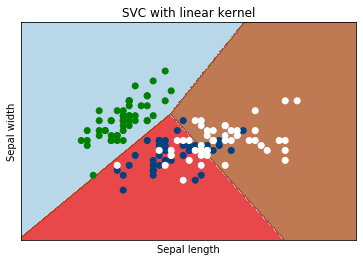

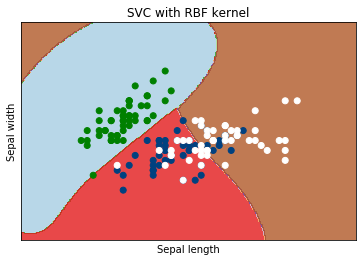

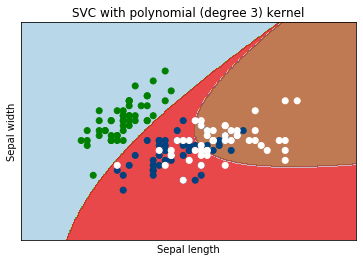

In [27]:
svc = svm.SVC(kernel='linear').fit(X_train, y_train)
rbf_svc = svm.SVC(kernel='rbf', gamma=0.7).fit(X_train, y_train)
poly_svc = svm.SVC(kernel='poly', degree=3).fit(X_train, y_train)

#Create a mesh to plot in
h = .02  # step size in the mesh
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

#Define title for the plots
titles = ['SVC with linear kernel',
          'SVC with RBF kernel',
          'SVC with polynomial (degree 3) kernel']


for i, clf in enumerate((svc, rbf_svc, poly_svc)):
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, m_max]x[y_min, y_max].
    plt.figure(i)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.ocean)
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.title(titles[i])

plt.show()